In [15]:
import pandas as pd
import numpy as np
import json 
import os

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
report_dir = "../data/relation_extraction/results_report"

In [16]:
langs = ["bi", "cbk-zam", "jam", "pih", "tpi"]

In [26]:
output_dir = "../ZS_BERT/output"

In [35]:
def process_one_file(filepath):
    with open(filepath) as f:
        data = json.load(f)
    
    sents=[]
    ent1s=[]
    ent2s=[]
    en1qs=[]
    en2qs=[]
    golds=[]
    preds=[]
    predstrue=[]
    for item in data:
        tokens= item["tokens"]
        sentence=" ".join(tokens)
        edge= item["edgeSet"]
        left = edge["left"]
        right=edge["right"]
        ent1 = " ".join([tokens[x] for x in left])
        ent2 = " ".join([tokens[x] for x in right])
        pred = edge["property"]
        en1q,en2q,gold = edge["triple"]
        prediction= edge["prediction"]
        
        sents.append(sentence)
        ent1s.append(ent1)
        ent2s.append(ent2)
        en1qs.append(en1q)
        en2qs.append(en2q)
        golds.append(gold)
        preds.append(pred)
        predstrue.append(prediction)
        
    df = pd.DataFrame.from_dict({
        "Sentence":sents,
        "ENT1":ent1s,
        "ENT2":ent2s,
        "ENT1_Qcode":en1qs,
        "ENT2_Qcode":en2qs,
        "Property":golds,
        "Pred_Property":preds,
        "Prediction":predstrue
    })
    df.to_csv(filepath.replace(".json", ".csv"), index=False)
    return df
    

In [36]:
for lang in langs:
    filepath= f"{output_dir}/{lang}.json"
    print(filepath)
    process_one_file(filepath)
    

../ZS_BERT/output/bi.json
../ZS_BERT/output/cbk-zam.json
../ZS_BERT/output/jam.json
../ZS_BERT/output/pih.json
../ZS_BERT/output/tpi.json


In [19]:

for lang in langs:
    filepath = f"{report_dir}/{lang}.json"
    print(lang)
    df = pd.read_json(filepath).T
    print(df)

bi
              precision    recall  f1-score    support
P106           0.923077  0.800000  0.857143  30.000000
P131           0.000000  0.000000  0.000000  11.000000
P1376          0.400000  0.125000  0.190476  16.000000
P17            0.000000  0.000000  0.000000  10.000000
P30            0.933333  0.736842  0.823529  19.000000
P39            0.473684  0.900000  0.620690  10.000000
P495           0.083333  0.333333  0.133333   3.000000
accuracy       0.505051  0.505051  0.505051   0.505051
macro avg      0.401918  0.413596  0.375024  99.000000
weighted avg   0.573863  0.505051  0.515312  99.000000
cbk-zam
              precision    recall  f1-score    support
P106           1.000000  1.000000  1.000000  44.000000
P131           0.000000  0.000000  0.000000   4.000000
P1376          0.000000  0.000000  0.000000  11.000000
P17            0.681818  1.000000  0.810811  30.000000
P30            0.888889  1.000000  0.941176   8.000000
P361           0.000000  0.000000  0.000000   1.000000

# Property distribution in train/test data zs-bert

In [20]:
labels=["P106", "P131","P1376", "P17", "P2341", "P2936", "P30", "P31", "P36", "P37",  "P361", "P39", "P495"]

In [2]:
data_dir = "../ZS_BERT/data/m5"

In [3]:
with open(f"{data_dir}/test.json") as f:
    test_data= json.load(f)

with open(f"{data_dir}/train.json") as f:
    train_data= json.load(f)

In [8]:
properties_train = []

for item in train_data:
    prop = item["edgeSet"][0]["kbID"]
    properties_train.append(prop)

In [9]:
len(properties_train)

89007

In [10]:
properties_train[:10]

['P101',
 'P101',
 'P101',
 'P101',
 'P101',
 'P101',
 'P101',
 'P101',
 'P101',
 'P101']

In [21]:
properties = [x for x in properties_train if x in labels]

In [24]:
len(labels)

13

In [25]:
set(labels).difference(set(properties))

{'P1376', 'P2341', 'P2936', 'P361'}

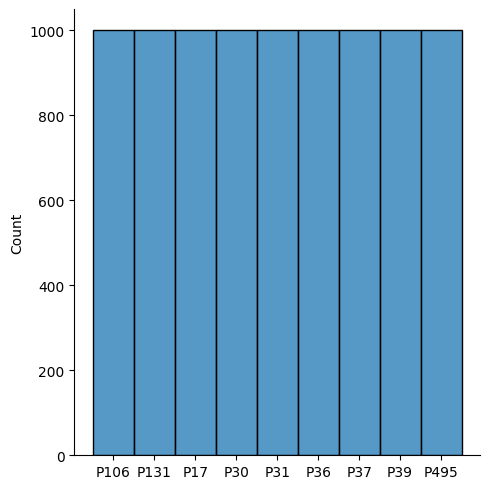

In [23]:
sns.displot(properties)